<h3> Ramki danych

<h4> Tworzenie i podstawowe operacje na ramkach danych

In [1]:
d = data.frame(osoba = c("Marek","Jarek","Anna"), wiek = c(20,30,40), plec = factor(c("M","M","K")), uczelnia = c("UJ","AGH","UJ"))
print(d)

  osoba wiek plec uczelnia
1 Marek   20    M       UJ
2 Jarek   30    M      AGH
3  Anna   40    K       UJ


In [2]:
dim(d); nrow(d); ncol(d) #wymiary d

[1] 3 4

[1] 3

[1] 4

In [3]:
summary(d) #podsumowanie wynikow z tabelki

   osoba        wiek    plec  uczelnia
 Anna :1   Min.   :20   K:1   AGH:1   
 Jarek:1   1st Qu.:25   M:2   UJ :2   
 Marek:1   Median :30                 
           Mean   :30                 
           3rd Qu.:35                 
           Max.   :40                 

In [4]:
print(head(d, 2)) #pierwsze dwa rekordy

  osoba wiek plec uczelnia
1 Marek   20    M       UJ
2 Jarek   30    M      AGH


In [5]:
print(tail(d, 2)) #ostatnie dwa rekordy

  osoba wiek plec uczelnia
2 Jarek   30    M      AGH
3  Anna   40    K       UJ


In [6]:
typeof(d); class(d) #ramka danych implementowana jest jako lista

[1] "list"

[1] "data.frame"

In [7]:
attributes(d) #dostępne atrybuty

$names
[1] "osoba"    "wiek"     "plec"     "uczelnia"

$class
[1] "data.frame"

$row.names
[1] 1 2 3

In [8]:
print(names(d))

[1] "osoba"    "wiek"     "plec"     "uczelnia"


In [9]:
print(rownames(d))

[1] "1" "2" "3"


In [10]:
print(colnames(d)) #w przypadku ramek danych pokazuje to samo co names

[1] "osoba"    "wiek"     "plec"     "uczelnia"


In [11]:
str(d) #struktura d; zauważmy że napisy traktowane są jako czynniki (osoba czy plec)    

'data.frame':	3 obs. of  4 variables:
 $ osoba   : Factor w/ 3 levels "Anna","Jarek",..: 3 2 1
 $ wiek    : num  20 30 40
 $ plec    : Factor w/ 2 levels "K","M": 2 2 1
 $ uczelnia: Factor w/ 2 levels "AGH","UJ": 2 1 2


In [12]:
#jezeli nie chcemy traktowac wszystkich napisow jako czynniki to dodajemy stringsAsFactors = FALSE
d2 = data.frame(osoba = c("Marek","Jarek","Anna"), wiek = c(20,30,40), plec = factor(c("M","M","K")), stringsAsFactors = FALSE)
print(d2); str(d2) #porownac osoba

  osoba wiek plec
1 Marek   20    M
2 Jarek   30    M
3  Anna   40    K
'data.frame':	3 obs. of  3 variables:
 $ osoba: chr  "Marek" "Jarek" "Anna"
 $ wiek : num  20 30 40
 $ plec : Factor w/ 2 levels "K","M": 2 2 1


In [13]:
print(d)

  osoba wiek plec uczelnia
1 Marek   20    M       UJ
2 Jarek   30    M      AGH
3  Anna   40    K       UJ


In [14]:
print(d[1,]) #pierwszy wiersz

  osoba wiek plec uczelnia
1 Marek   20    M       UJ


In [15]:
print(d[,1]) #pierwsza kolumna

[1] Marek Jarek Anna 
Levels: Anna Jarek Marek


In [16]:
print(d[1,2]) #pole z pierwszego wiersza i drugiej kolumny

[1] 20


In [17]:
print(d[1:3,2]) #wierssze 1, 2 i 3; kolumna 2

[1] 20 30 40


In [18]:
print(d$osoba) #tak tez sie moge odwolywac do kolumn

[1] Marek Jarek Anna 
Levels: Anna Jarek Marek


In [19]:
print(d["osoba"]) #jeszcze inny sposob

  osoba
1 Marek
2 Jarek
3  Anna


In [20]:
#dodawanie nowego rekordu(wiersza)
nowy = data.frame(osoba = "Magda", wiek = 22, plec = factor("K", levels = levels(d$plec)), uczelnia = "UR")
dd = rbind(d, nowy)
print(dd)

  osoba wiek plec uczelnia
1 Marek   20    M       UJ
2 Jarek   30    M      AGH
3  Anna   40    K       UJ
4 Magda   22    K       UR


In [21]:
#dodawanie nowej kolumny
new_c = c(1,2,3,3)
dd2 = cbind(dd, new_c)
print(dd2)

  osoba wiek plec uczelnia new_c
1 Marek   20    M       UJ     1
2 Jarek   30    M      AGH     2
3  Anna   40    K       UJ     3
4 Magda   22    K       UR     3


In [22]:
#wybor kolumn
print(subset(dd2, select = c(osoba, wiek)))

  osoba wiek
1 Marek   20
2 Jarek   30
3  Anna   40
4 Magda   22


In [23]:
#wszystkie kolumny bez plci
subset(dd2, select =- plec) 

osoba,wiek,uczelnia,new_c
Marek,20,UJ,1
Jarek,30,AGH,2
Anna,40,UJ,3
Magda,22,UR,3


In [24]:
print(dd2$plec == "M") #sprawdza dla kazdego rekordu

[1]  TRUE  TRUE FALSE FALSE


In [25]:
#wybieranie podzbioru danych o zadanych warunkach
print(subset(dd2, wiek > 20 & plec == "M"))

  osoba wiek plec uczelnia new_c
2 Jarek   30    M      AGH     2


In [26]:
print(dd2[dd2$plec == "M",]) #mozna tez tak

  osoba wiek plec uczelnia new_c
1 Marek   20    M       UJ     1
2 Jarek   30    M      AGH     2


In [27]:
print(dd2[dd2$plec == "M", c("osoba","wiek")]) #moge sprecyzowac ktore kolumny chce zostawic

  osoba wiek
1 Marek   20
2 Jarek   30


In [28]:
#podzial danych ze względu na plec

print(split(dd2, dd2$plec))

$K
  osoba wiek plec uczelnia new_c
3  Anna   40    K       UJ     3
4 Magda   22    K       UR     3

$M
  osoba wiek plec uczelnia new_c
1 Marek   20    M       UJ     1
2 Jarek   30    M      AGH     2



In [29]:
dd2$wiek = dd2$wiek + 10 #moge modyfikowac wartosci
print(dd2)

  osoba wiek plec uczelnia new_c
1 Marek   30    M       UJ     1
2 Jarek   40    M      AGH     2
3  Anna   50    K       UJ     3
4 Magda   32    K       UR     3


<h4> Otwieranie i zapisywanie do pliku

In [30]:
write.table(dd2, file = "dd.txt", row.names=FALSE)  

In [31]:
dane =  read.table(file="dd.txt", sep=" ", header=TRUE, stringsAsFactors=F)    
print(dane)

  osoba wiek plec uczelnia new_c
1 Marek   30    M       UJ     1
2 Jarek   40    M      AGH     2
3  Anna   50    K       UJ     3
4 Magda   32    K       UR     3


In [32]:
#dane czytane z internetu (tabelaryczne)
dane2 = read.table(file="https://raw.githubusercontent.com/zief0002/miniature-garbanzo/main/data/gapminder.csv", sep=",", header=T, stringsAsFactors=F) #\t - tab
head(dane2)

country,year,pop,continent,lifeExp,gdpPercap
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


Inne podobne metody: 

- read.csv(): pliki rozdzielone przecinkiem (.csv)

- read.csv2(): gdy używamy przecinka w liczbach dziesiętnych a jako separatora ;

- read.delim(): dane rodzielone tab (“.txt”). Standardowo kropka używana jest w zapisie dziesiętnym.

- read.delim2(): dane rodzielone tab (“.txt”). Standardowo przecinek używany jest w zapisie dziesiętnym.

In [33]:
write.csv(dd2, file = 'dane.csv')

In [34]:
write.csv(dd2, file = 'dane2.csv', row.names = F, quote = F) #bez nazw wierwszy i bez cudzyslowu

In [35]:
dd2r = read.csv(file = 'dane2.csv', stringsAsFactors = FALSE)
print(dd2r)

  osoba wiek plec uczelnia new_c
1 Marek   30    M       UJ     1
2 Jarek   40    M      AGH     2
3  Anna   50    K       UJ     3
4 Magda   32    K       UR     3


In [36]:
#dane z internetu (tabelaryczne)
download.file("https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder_data.csv", destfile = "dane3.csv")
dd3r = read.csv("dane3.csv", stringsAsFactors = TRUE)
head(dd3r)

country,year,pop,continent,lifeExp,gdpPercap
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


<h4> R i SQL - pobieranie informacji z baz danych

In [88]:
library(RSQLite)

In [38]:
polaczenie = dbConnect(SQLite(), "survey.db") #łączymy się z bazą danych
wyniki =  dbGetQuery(polaczenie, "SELECT Site.lat, Site.long FROM Site;") #pobieram pewne rekordy
print(wyniki)
dbDisconnect(polaczenie) #zamykamy polaczenie z baza danych

     lat    long
1 -49.85 -128.57
2 -47.15 -126.72
3 -48.87 -123.40


<h4> R i JSON

In [39]:
library("jsonlite")

In [40]:
url = "https://opendata-download-metobs.smhi.se/api/version/1.0/parameter/2/station/98210/period/latest-months/data.json"
dane = fromJSON(url)
head(dane)

from,to,ref,value,quality
1.635379e+12,1.635466e+12,2021-10-28,12.2,Y
1.635466e+12,1.635552e+12,2021-10-29,9.5,Y
1.635552e+12,1.635638e+12,2021-10-30,8.5,Y
1.635638e+12,1.635725e+12,2021-10-31,8.9,Y
1.635725e+12,1.635811e+12,2021-11-01,9.9,Y
1.635811e+12,1.635898e+12,2021-11-02,8.7,Y
1.635898e+12,1.635984e+12,2021-11-03,8.1,Y
1.635984e+12,1.636070e+12,2021-11-04,6.8,Y
1.636070e+12,1.636157e+12,2021-11-05,5.8,Y
1.636157e+12,1.636243e+12,2021-11-06,4.6,Y


In [41]:
attributes(dane) #atrybuty

$names
[1] "value"     "updated"   "parameter" "station"   "period"    "position" 
[7] "link"

<h4> R i HTML

In [89]:
library(rvest)

In [43]:
url = "https://pl.wikipedia.org/wiki/Ludno%C5%9B%C4%87_%C5%9Bwiata"
wiki = read_html(url)
tabele = html_nodes(wiki, "table") #pobiera wszystkie tabele
tabele

{xml_nodeset (3)}
[1] <table border="1" cellpadding="3" cellspacing="0" style="border: 1px gray ...
[2] <table border="1" cellpadding="3" cellspacing="0" style="border: 1px gray ...
[3] <table border="1" cellpadding="3" cellspacing="0" style="border: 1px gray ...

In [44]:
tabela3 = html_table(tabele[[3]], fill = TRUE)
head(tabela3)

,Europa,Azja,Ameryka Północna,Ameryka Łacińska,Afryka,Oceania,Świat
Rok,Ludność w milionach,Ludność w milionach,Ludność w milionach,Ludność w milionach,Ludność w milionach,Ludność w milionach,Ludność w milionach
2012,726,4192,402,620,1039,38,7022
2011,735,4154,389,605,1015,36,6945
2008,730,4085,337,577,973,34,6736
2007,731,4042,330,572,965,34,6658
2005,731,3938,332,558,922,33,6515


<h4> Użyteczne metody 

In [45]:
dane = data.frame(c1 = c(1,2,2,3,4), c2 = c(-2,-2,-3,-4,8))
print(dane)

  c1 c2
1  1 -2
2  2 -2
3  2 -3
4  3 -4
5  4  8


In [46]:
print(apply(dane, 2, mean)) #srednie kolumn, inne funkcje:  sd, var, min, min, max, median, range, quantile, IQR

  c1   c2 
 2.4 -0.6 


In [47]:
print(apply(dane, 1, mean)) #srednie dla wierszy

[1] -0.5  0.0 -0.5 -0.5  6.0


In [48]:
print(lapply(dane, mean)) #lapply - podobna do apply ale moze byc zastowana dla szerszej klasy obiektow (typow)

$c1
[1] 2.4

$c2
[1] -0.6



In [49]:
print(lapply(dane, function(x){x+4}))

$c1
[1] 5 6 6 7 8

$c2
[1]  2  2  1  0 12



In [50]:
print(lapply(1:5, function(x){sum(dane[x,])})) #sumuje kolejne wartosci w wierszach dane

[[1]]
[1] -1

[[2]]
[1] 0

[[3]]
[1] -1

[[4]]
[1] -1

[[5]]
[1] 12



In [51]:
print(sapply(1:5, function(x){sum(dane[x,])})) #w zasadzie dziala jak lappply ale próbuje zwrocic wynik w jak najprosztej postaci, domyslnie wektorze

[1] -1  0 -1 -1 12


In [52]:
print(sapply(1:5, function(x){sum(dane[x,])}, simplify = FALSE)) #gdy simplify jest FALSE w zasadzie jest tozsama z lapply

[[1]]
[1] -1

[[2]]
[1] 0

[[3]]
[1] -1

[[4]]
[1] -1

[[5]]
[1] 12



<h4> dplyr i tidyr

In [5]:
help(package = dplyr) #opis pakietu

In [87]:
library(dplyr) #jezeli nie mamy to install.packages("dplyr")
library(tidyr) # --||--

In [90]:
aq = airquality
head(aq); dim(aq)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6


[1] 153   6

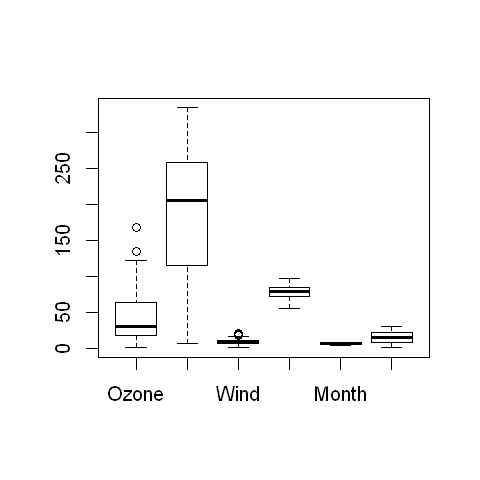

In [56]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(aq) #wykresy pudelkowe dla kazdej kolumny

Kawałkowanie (Slicing)

In [91]:
aq %>% slice(2) #ten sam efekt co aq[2, ]

Ozone,Solar.R,Wind,Temp,Month,Day
36,118,8,72,5,2


In [92]:
aq %>% slice(3:5) #ten sam efekt co aq[3:5,]

Ozone,Solar.R,Wind,Temp,Month,Day
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5


In [59]:
aq %>% slice(c(3, 7, 15)) #ten sam efekt co aq[c(3,7,15),]

Ozone,Solar.R,Wind,Temp,Month,Day
12,149,12.6,74,5,3
23,299,8.6,65,5,7
18,65,13.2,58,5,15


In [60]:
head(aq %>% slice(-c(3, 7, 15))) #wszystko z wyjątkiem 3, 7 i 15 wiersza; inaczej aq[-c(3, 7, 15),]

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,5,1
36,118,8.0,72,5,2
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
19,99,13.8,59,5,8


Filtrowanie

In [61]:
head(aq %>% filter(Temp > 90)) #ten sam efekt co aq[aq$Temp > 90,]; mozna tez uzywac wyrazen regularnych tpu dane %>% filter(grepl("B[a-z]",nazwa_kolumny)) - rekordy zaczynajace sie od B

Ozone,Solar.R,Wind,Temp,Month,Day
NA,259,10.9,93,6,11
NA,250,9.2,92,6,12
97,267,6.3,92,7,8
97,272,5.7,92,7,9
NA,291,14.9,91,7,14
NA,222,8.6,92,8,10


In [62]:
aq %>% filter(Temp > 90, Month == 6) #ten sam efekt co aq[aq$Temp > 90 & aq$Month == 6,]

Ozone,Solar.R,Wind,Temp,Month,Day
NA,259,10.9,93,6,11
NA,250,9.2,92,6,12


In [63]:
head(aq %>% filter(between(Temp, 80, 90)))

Ozone,Solar.R,Wind,Temp,Month,Day
45,252,14.9,81,5,29
NA,186,9.2,84,6,4
NA,220,8.6,85,6,5
29,127,9.7,82,6,7
NA,273,6.9,87,6,8
71,291,13.8,90,6,9


Mutowanie

In [64]:
aq %>% mutate(Wind = Wind * 2) -> aq #mozna zmieniac istniejącą juz kolumne
head(aq)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,14.8,67,5,1
36,118,16.0,72,5,2
12,149,25.2,74,5,3
18,313,23.0,62,5,4
NA,NA,28.6,56,5,5
28,NA,29.8,66,5,6


In [65]:
aq %>% mutate(double_temp = Temp*2) -> aq #dodaje nową kolumne na podstawie juz istniejących
head(aq)

Ozone,Solar.R,Wind,Temp,Month,Day,double_temp
41,190,14.8,67,5,1,134
36,118,16.0,72,5,2,144
12,149,25.2,74,5,3,148
18,313,23.0,62,5,4,124
NA,NA,28.6,56,5,5,112
28,NA,29.8,66,5,6,132


In [66]:
aq %>% mutate(Hot = Temp > 90) -> aq #nowa kolumna z wartosciami TRUE/FALSE
head(aq)

Ozone,Solar.R,Wind,Temp,Month,Day,double_temp,Hot
41,190,14.8,67,5,1,134,FALSE
36,118,16.0,72,5,2,144,FALSE
12,149,25.2,74,5,3,148,FALSE
18,313,23.0,62,5,4,124,FALSE
NA,NA,28.6,56,5,5,112,FALSE
28,NA,29.8,66,5,6,132,FALSE


Select

In [67]:
head(aq %>% select(Ozone, Wind)) #wybieranie kolumn

Ozone,Wind
41,14.8
36,16.0
12,25.2
18,23.0
NA,28.6
28,29.8


In [68]:
head(aq %>% select(contains("n"))) #te kolumny ktore zawierają n

Ozone,Wind,Month
41,14.8,5
36,16.0,5
12,25.2,5
18,23.0,5
NA,28.6,5
28,29.8,5


In [69]:
head(aq %>% arrange(Solar.R)) #sortuje wiersze wg cechy; jezeli w odwrotnej kolejnosci to arrange(desc(cecha))

Ozone,Solar.R,Wind,Temp,Month,Day,double_temp,Hot
16,7,13.8,74,7,21,148,FALSE
1,8,19.4,59,5,21,118,FALSE
23,13,24.0,67,5,28,134,FALSE
23,14,18.4,71,9,22,142,FALSE
8,19,40.2,61,5,9,122,FALSE
14,20,33.2,63,9,25,126,FALSE


In [70]:
aq %>% select(-Hot) -> aq #bez HOT
head(aq)

Ozone,Solar.R,Wind,Temp,Month,Day,double_temp
41,190,14.8,67,5,1,134
36,118,16.0,72,5,2,144
12,149,25.2,74,5,3,148
18,313,23.0,62,5,4,124
NA,NA,28.6,56,5,5,112
28,NA,29.8,66,5,6,132


In [71]:
aq %>% select(-Wind, -Day) -> aq #bez 2 kolumn
head(aq)

Ozone,Solar.R,Temp,Month,double_temp
41,190,67,5,134
36,118,72,5,144
12,149,74,5,148
18,313,62,5,124
NA,NA,56,5,112
28,NA,66,5,132


Inne

In [72]:
aq %>% rename(O3 = Ozone) -> aq #zmiana nazwy, mozna tez za pomocą setnames(aq, "Ozone", "O")
head(aq)

O3,Solar.R,Temp,Month,double_temp
41,190,67,5,134
36,118,72,5,144
12,149,74,5,148
18,313,62,5,124
NA,NA,56,5,112
28,NA,66,5,132


In [73]:
aq %>% top_n(5, Temp) #5 Top temperatur, wiecej rekordow bo kilka z tymi samymi temperaturami

O3,Solar.R,Temp,Month,double_temp
NA,259,93,6,186
76,203,97,8,194
118,225,94,8,188
84,237,96,8,192
85,188,94,8,188
73,183,93,9,186
91,189,93,9,186


In [74]:
aq %>% sample_n(5) #losowe 5

O3,Solar.R,Temp,Month,double_temp
135,269,84,7,168
73,183,93,9,186
NA,101,84,7,168
23,14,71,9,142
6,78,57,5,114


In [75]:
head(aq %>% distinct) #usuwanie replikatow, ten sam efekt co unique(aq)

O3,Solar.R,Temp,Month,double_temp
41,190,67,5,134
36,118,72,5,144
12,149,74,5,148
18,313,62,5,124
NA,NA,56,5,112
28,NA,66,5,132


In [76]:
head(aq %>% drop_na) #usuwa te z NA; inne rozwiazanie na.omit(aq); z tidyr

O3,Solar.R,Temp,Month,double_temp
41,190,67,5,134
36,118,72,5,144
12,149,74,5,148
18,313,62,5,124
23,299,65,5,130
19,99,59,5,118


In [77]:
#Przetwarzanie potokowe 1

aq %>% group_by(Month) %>% summarise(meanTemp = mean(Temp)) #grupowanie

Month,meanTemp
5,65.54839
6,79.10000
7,83.90323
8,83.96774
9,76.90000


In [78]:
#Przetwarzanie potokowe 2

aq %>%
  filter(Temp >= 50 & Temp <= 85) %>% #wybieramy te co mają temperature z tego zakresu
  group_by(Month) %>%                 #grupujemy po miesiącach
  summarise(srednia = mean(Temp)) %>% #liczymy srednie temperatury
  arrange(desc(srednia))              #posortujmy te wyniki malejąco

Month,srednia
7,81.71429
8,78.94118
6,76.96000
9,74.04000
5,65.54839


Długie i szerokie ramki danych

In [79]:
szerokie_dane =  read.table("szerokie.txt", sep=",", header = TRUE)
print(szerokie_dane)

Warning message in read.table("szerokie.txt", sep = ",", header = TRUE):
"niekompletna końcowa linia znaleziona przez 'readTableHeader' w 'szerokie.txt'"

  v1 v2 v3
1  1  2  3
2  4  5  6
3  7  8  9


In [80]:
#z postaci szerokiej na dlugą:
dlugie_dane = pivot_longer(szerokie_dane, c(v1,v2,v3)) #analogiczna funkcja pivot_wider generuje przeciwne przejscie
dlugie_dane

name,value
v1,1
v2,2
v3,3
v1,4
v2,5
v3,6
v1,7
v2,8
v3,9


<h4> dplyr+ggplot2

In [81]:
head(dd3r) #dane zdefiniowane wczensiej

country,year,pop,continent,lifeExp,gdpPercap
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [82]:
options(repr.plot.width=10, repr.plot.height=10)

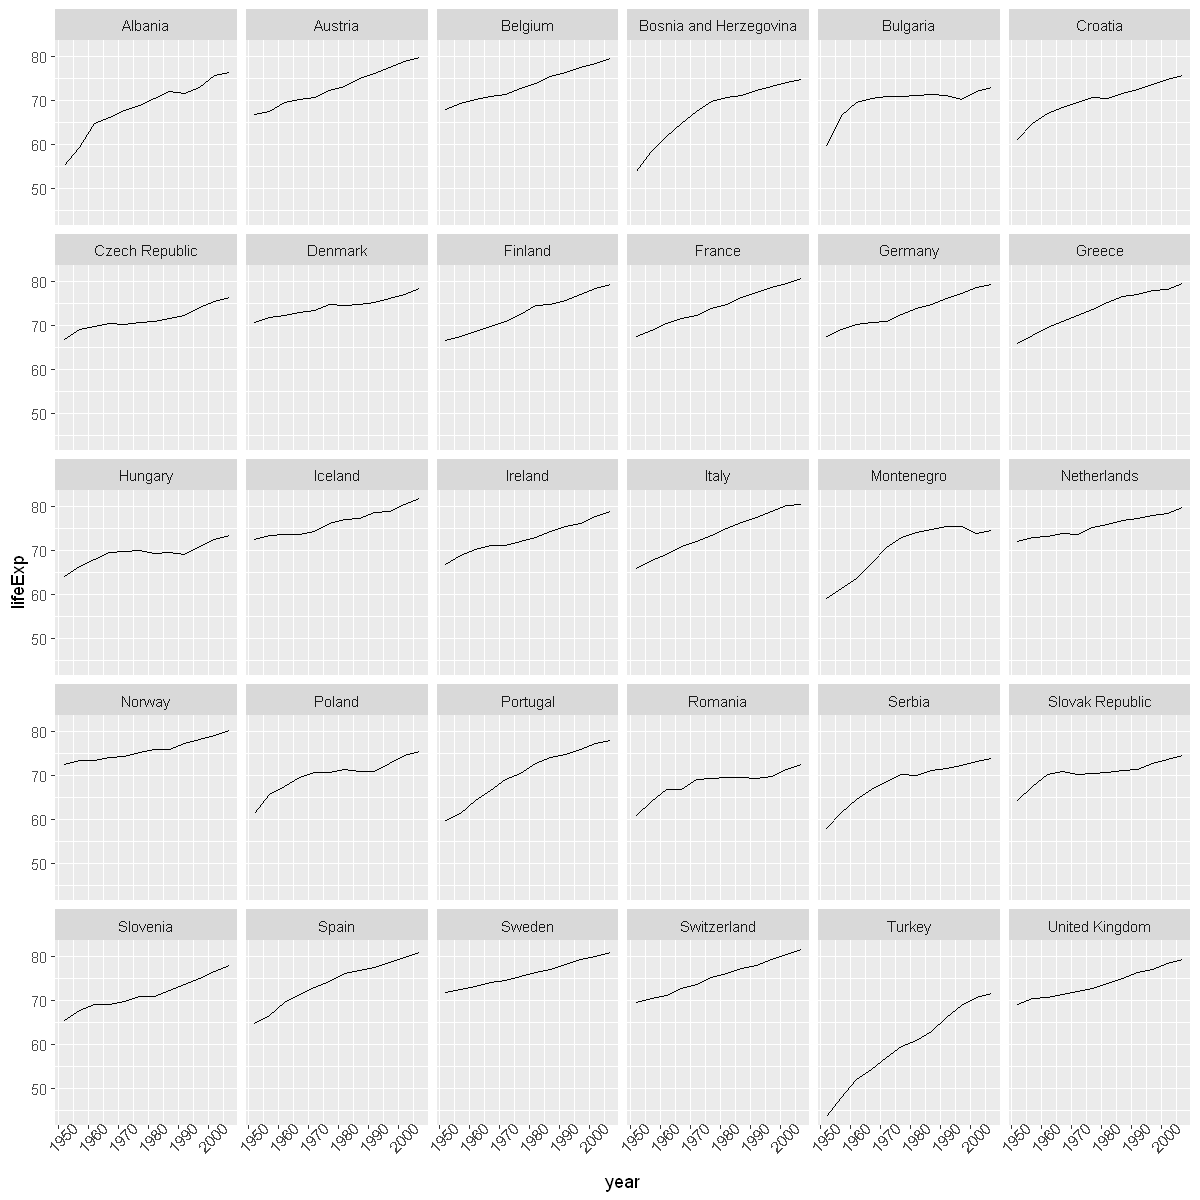

In [83]:
library(ggplot2)
europejczycy = dd3r[dd3r$continent == "Europe", ]
ggplot(data = europejczycy, mapping = aes(x = year, y = lifeExp)) +
  geom_line() +
  facet_wrap( ~ country) +
  theme(axis.text.x = element_text(angle = 45))

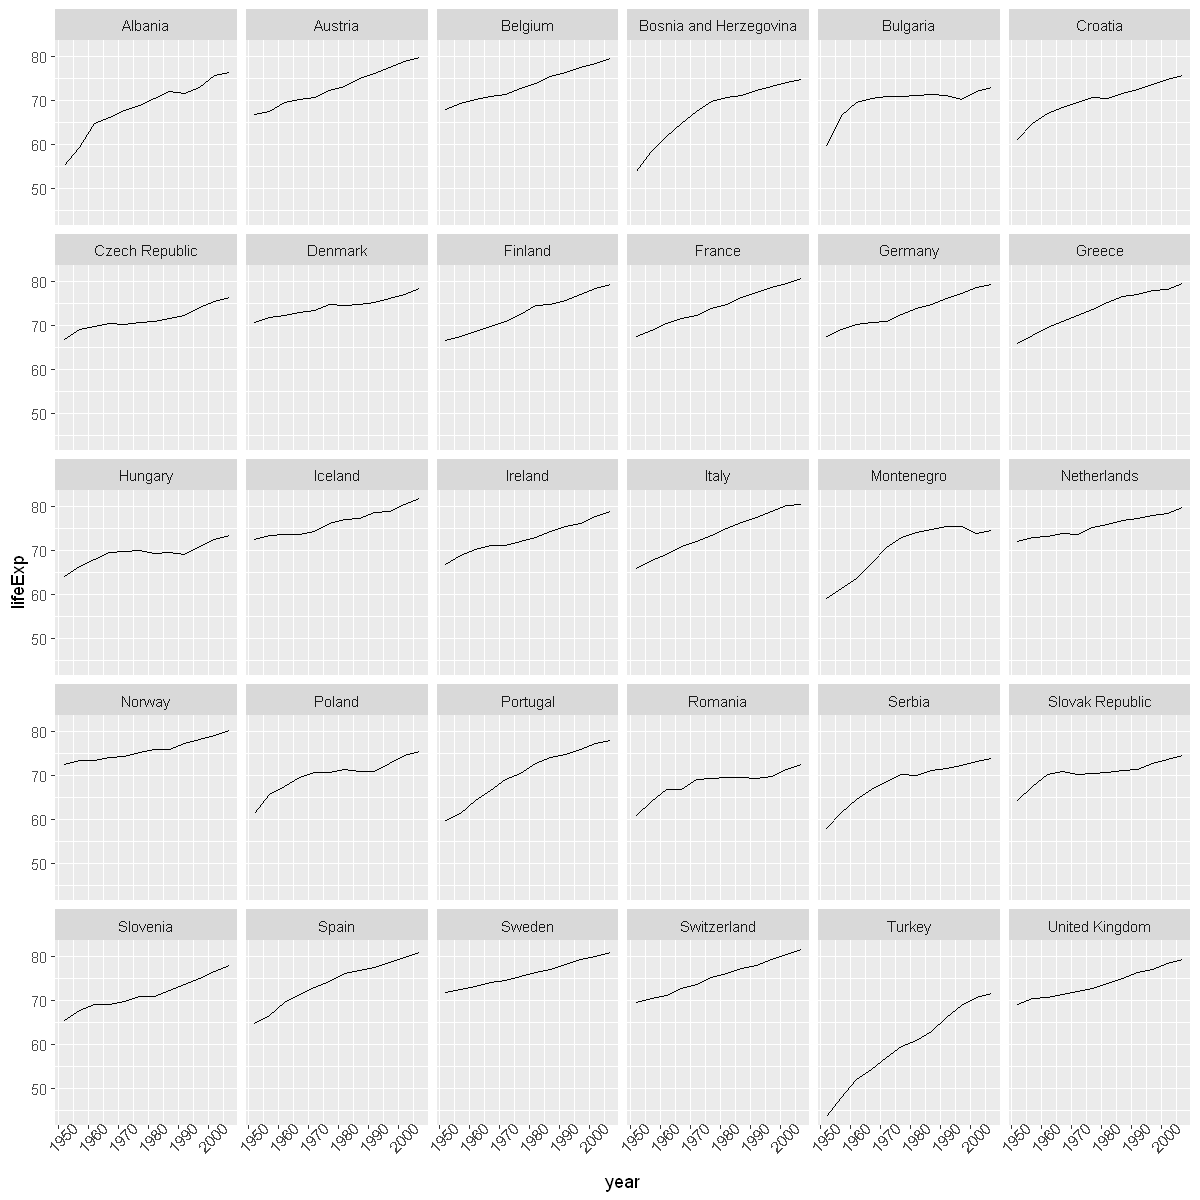

In [84]:
dd3r %>%
  filter(continent == "Europe") %>%
  ggplot(mapping = aes(x = year, y = lifeExp)) +
  geom_line() +
  facet_wrap( ~ country) +
  theme(axis.text.x = element_text(angle = 45))

In [85]:
options(repr.plot.width=10, repr.plot.height=2)

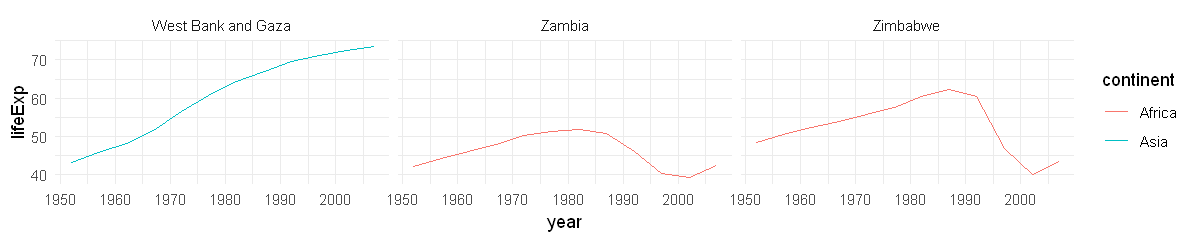

In [86]:
dd3r %>%
  mutate(startsWith = substr(country, 1, 1)) %>% #tworzymy nową kolumne z pierwsza litera panstwa
  filter(startsWith %in% c("W", "Z")) %>%       #zachowujemy tylko te panstwa co zaczynaja sie od W lub Z
  ggplot(aes(x = year, y = lifeExp, colour = continent)) +  #kolorujemy na podstawie kontynentu
  geom_line() +
  facet_wrap(vars(country)) +
  theme_minimal()